# A sample notebook of processing the earthquakes dataset

To get the data into Python, I import pandas and open the dataset. Note the use of parse dates and index_col to get a datetime object for each record as the index column

In [1]:
import pandas as pd
df = pd.read_csv('../../data/earthquakes_2015_2016_gt45.csv', parse_dates = ['time',], index_col='time')

Then I import more modules I will use later adn up the font size

In [2]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np
import seaborn as sns
plt.rcParams.update({"font.size": 18})


Let's look at the data first

In [3]:
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2016-11-22 16:03:30.770000+00:00,-24.8982,179.7713,517.23,5.0,mb,NaN,52.0,4.790,1.14,us,...,2016-11-22T16:27:59.040Z,South of the Fiji Islands,earthquake,11.0,6.9,0.035,257.0,reviewed,us,us
2016-11-22 15:15:19.680000+00:00,-44.1111,38.3580,10.00,4.7,mb,NaN,52.0,17.568,0.87,us,...,2016-11-22T17:02:14.040Z,Prince Edward Islands region,earthquake,12.4,1.9,0.113,24.0,reviewed,us,us
2016-11-22 14:10:40.650000+00:00,54.1202,-160.0522,16.19,4.9,mb,NaN,159.0,0.761,0.74,us,...,2016-11-22T16:48:48.040Z,"80km SSW of Chernabura Island, Alaska",earthquake,6.1,4.9,0.078,51.0,reviewed,us,us
2016-11-22 14:04:07.620000+00:00,-41.7822,174.1635,13.77,4.5,mb,NaN,105.0,0.050,0.73,us,...,2016-11-22T14:40:26.040Z,"34km SSE of Blenheim, New Zealand",earthquake,2.1,2.2,0.180,9.0,reviewed,us,us
2016-11-22 14:03:58.570000+00:00,37.2297,141.3797,13.16,5.2,mb,NaN,88.0,0.791,0.55,us,...,2016-11-22T16:25:04.075Z,"43km SE of Namie, Japan",earthquake,4.9,3.4,0.041,199.0,reviewed,us,us


## Stats

First off, lets make a histrogram of magnitude

[Text(0, 0.5, 'number of earthquakes'), Text(0.5, 0, 'magnitude')]

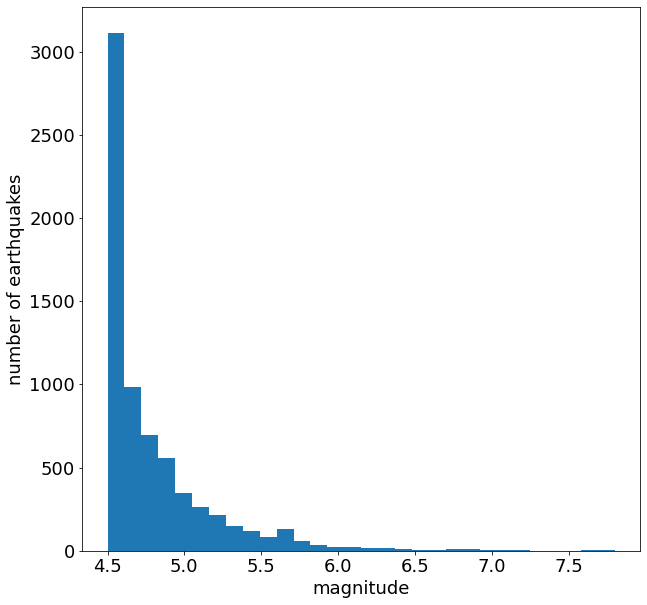

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df.mag,30);
ax.set(xlabel='magnitude', ylabel='number of earthquakes')

The expected exponential decrease of number of eathquakes with increasing magnitude is apparent. What other distributions might you investigate with the data?

With pandas and seaborn, we can look for correlations in the dataset

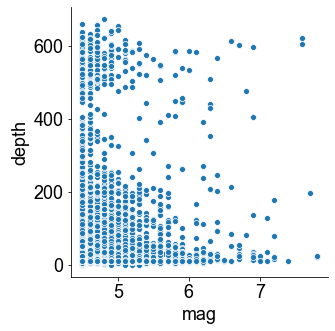

In [5]:
sns.relplot(x='mag', y='depth', data=df)
sns.set_style('ticks')

There is no apparent linear relation between magnitude and depth. We do note an interesting bimodal distribution of depths, with a minimum in observations around 300-450 km

How about error of magnitude estimate?

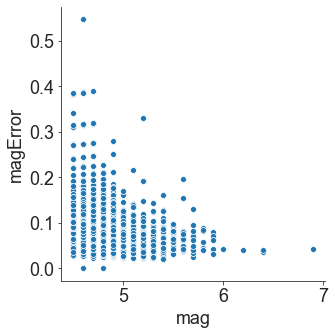

In [6]:
sns.relplot(x='mag', y='magError', data=df)
sns.set_style('ticks')

Weaker earthquake appear to have a greater uncertainty in magnitude error. Though this may influenced by sampling bias. How might you test this?

## Maps

The most relevant details for an earthquake worldwide distribution are lon, lat, magnitude and depth. With some work we can plot all these on a map

We'll start with a simple global map. As we're plotting earthquakes, I have opted to put the Pacific ring of fire at the centre of mine

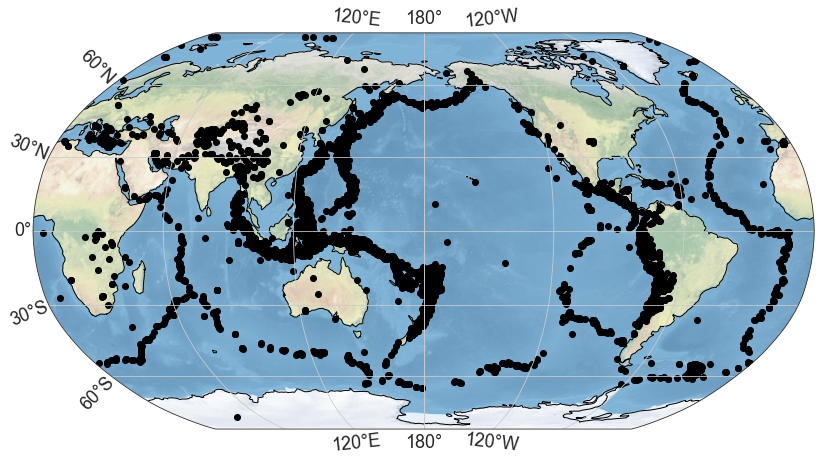

In [7]:
# Plot a basic global map
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
ax.stock_img()
# Add some scatter points of the earthquakes
ax.scatter(df.longitude, df.latitude, transform=ccrs.PlateCarree(), color='k')

As we would expect, the earthquakes are concentrated on plate boundaries

Let's focus on the big ones by making a new data set of only magnitide 6.0 and above. You can experiment with this setting

In [8]:
df_big = df.loc[df.mag>6.0]
f"df_big contains {np.round(100*len(df_big)/len(df),2)}% of the records in the original database df"

'df_big contains 1.61% of the records in the original database df'

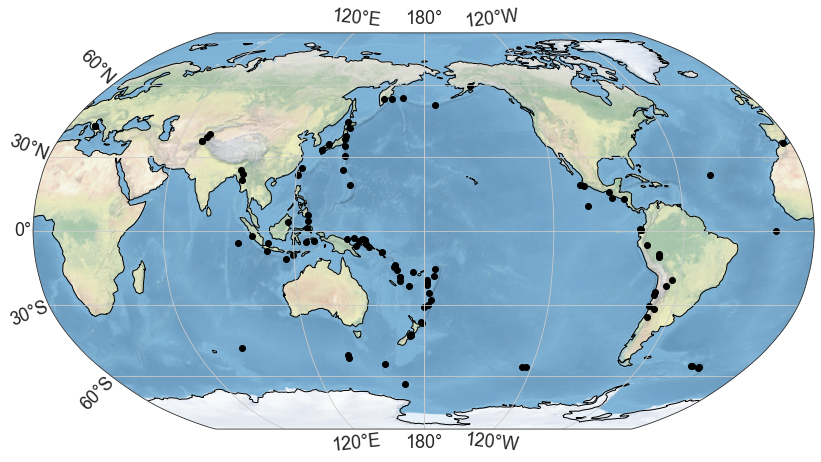

In [9]:
# Plot a basic global map
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
ax.stock_img()
# Add some scatter points of the earthquakes
ax.scatter(df_big.longitude, df_big.latitude, transform=ccrs.PlateCarree(), color='k')

We're going to use this map a lot, so let's make a simaple function. That way we'll have less duplicated code and will always generate the same map for plotting

In [10]:
def quakemap():
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
    ax.coastlines()
    ax.set_global()
    ax.gridlines(draw_labels=True)
    ax.stock_img()
    return fig, ax 

In the following steps, we'll add some more data to this. Remember that scatter plots can have varying size and colour as well as location

<Figure size 432x288 with 0 Axes>

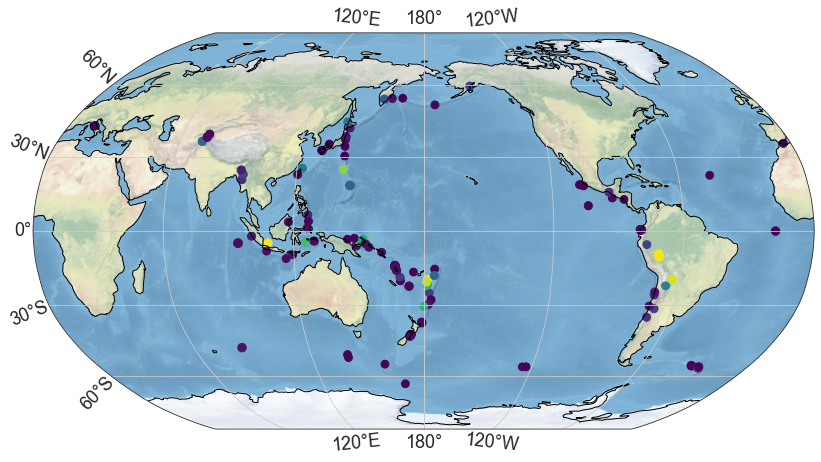

In [11]:
plt.set_cmap('viridis') # set your preferred colourmap here
fig, ax = quakemap()
# Add some scatter points of the earthquakes
ax.scatter(df_big.longitude, df_big.latitude, transform=ccrs.PlateCarree(), s=10*df_big.mag, c=df_big.depth)

We can see that the scatter points are now of different colours (depth) and if you squint you can see the sizes (magnitude). The latter is not very visible. As [earthquake magnitude is a logarithmic fucntion](https://en.wikipedia.org/wiki/Moment_magnitude_scale#Definition) it would make sense to plot earthquake size as an exponential of magnitude. I have also added an alpha channel so we can see earthwuakes whose symbols overlap


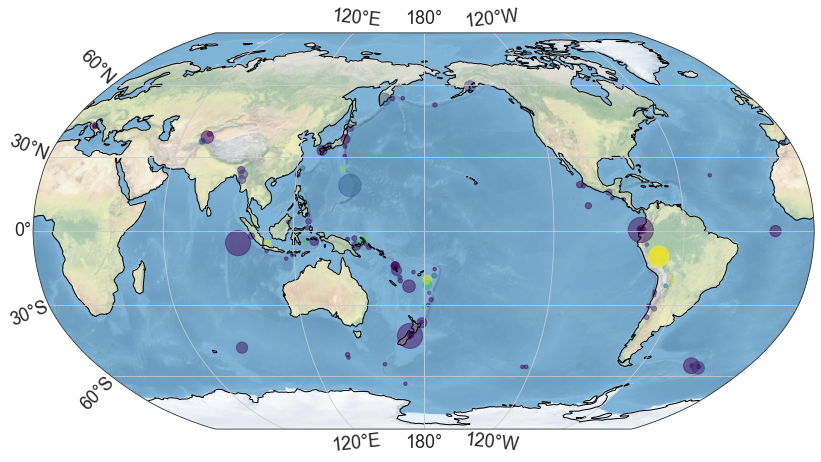

In [12]:
fig, ax = quakemap()
# Add some scatter points of the earthquakes
ax.scatter(df_big.longitude, df_big.latitude, transform=ccrs.PlateCarree(),
           s=(10**(df_big.mag))*1e-5, c=df_big.depth, alpha=0.5)

Let's add a legend so readers can make sense of this. We have to remember that we altered the scaling of the earthquakes, hence the complicated legend title

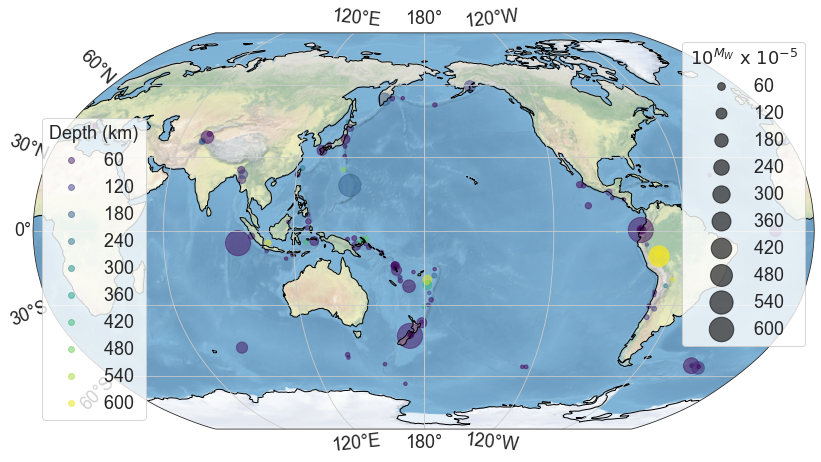

In [13]:
fig, ax = quakemap()
# Add some scatter points of the earthquakes
scatter = ax.scatter(df_big.longitude, df_big.latitude, transform=ccrs.PlateCarree(),
           s=(10**(df_big.mag))*1e-5, c=df_big.depth, alpha=0.5)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Depth (km)")
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="$10^{M_W}\ \mathrm{x}\ 10^{-5}$")


If we want to plot the original magntidue as a labels, we note that the `labels` object is just a list of strings

In [14]:
labels

['$\\mathdefault{60}$',
 '$\\mathdefault{120}$',
 '$\\mathdefault{180}$',
 '$\\mathdefault{240}$',
 '$\\mathdefault{300}$',
 '$\\mathdefault{360}$',
 '$\\mathdefault{420}$',
 '$\\mathdefault{480}$',
 '$\\mathdefault{540}$',
 '$\\mathdefault{600}$']

Let's extract them with [some regex](https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python)

In [15]:
import re
conv_mag = np.array([int(s) for s in re.findall(r'\b\d+\b', " ".join(labels))])

Convert them back to their original magnitudes

In [16]:
mag = np.log10(conv_mag*1e5)

And format the labels

In [17]:
mag_labels = ['$\\mathdefault{'+str(np.round(i,2))+'}$' for i in mag]

In [18]:
mag_labels

['$\\mathdefault{6.78}$',
 '$\\mathdefault{7.08}$',
 '$\\mathdefault{7.26}$',
 '$\\mathdefault{7.38}$',
 '$\\mathdefault{7.48}$',
 '$\\mathdefault{7.56}$',
 '$\\mathdefault{7.62}$',
 '$\\mathdefault{7.68}$',
 '$\\mathdefault{7.73}$',
 '$\\mathdefault{7.78}$']

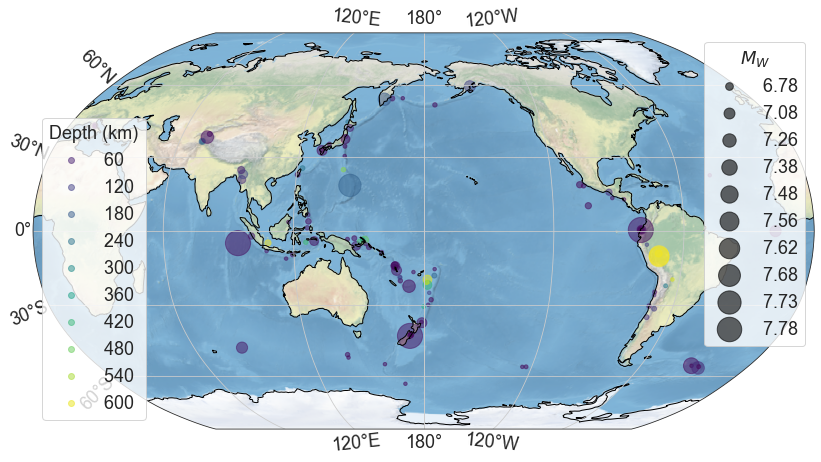

In [19]:
fig, ax = quakemap()
# Add some scatter points of the earthquakes
scatter = ax.scatter(df_big.longitude, df_big.latitude, transform=ccrs.PlateCarree(),
           s=(10**(df_big.mag))*1e-5, c=df_big.depth, alpha=0.5)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Depth (km)")
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, mag_labels, loc="upper right", title="$M_W$")

------------------------
### References
- https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
- https://en.wikipedia.org/wiki/Moment_magnitude_scale
- https://stackoverflow.com/questions/4289331/how-to-extract-numbers-from-a-string-in-python